In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("kc_house_data.csv")

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
pd.set_option('display.max_columns', 500)

In [6]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
df = df.drop(columns=["id", "date"])

In [9]:
continious = ["bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors", "grade",
              "sqft_above", "sqft_basement", "yr_built", "yr_renovated", "lat", "long", "sqft_living15", "sqft_lot15"]
discrete = ["waterfront", "view", "condition", "zipcode"]
label = "price"

<AxesSubplot:xlabel='price', ylabel='Count'>

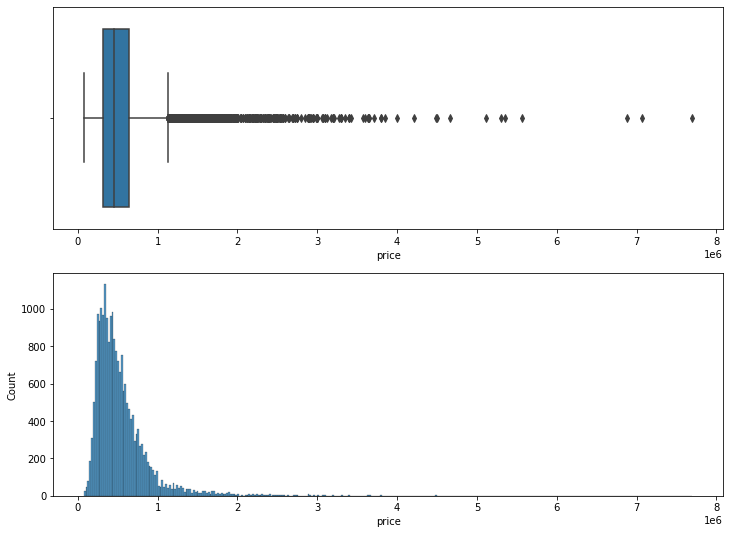

In [10]:
f, (ax1, ax2) = plt.subplots(2, figsize=(12,9))
sns.boxplot(data=df, x=label, ax=ax1)
sns.histplot(data=df, x=label, ax=ax2)

In [11]:
df[label].median()

450000.0

In [12]:
df[label].mean()

540088.1417665294

In [13]:
df[label] = np.log(df[label])

<AxesSubplot:xlabel='price', ylabel='Count'>

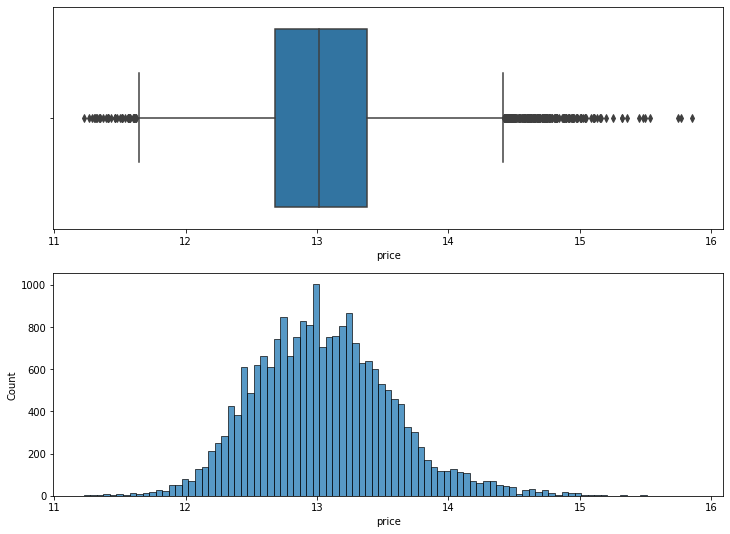

In [14]:
f, (ax1, ax2) = plt.subplots(2, figsize=(12,9))
sns.boxplot(data=df, x=label, ax=ax1)
sns.histplot(data=df, x=label, ax=ax2)

<AxesSubplot:>

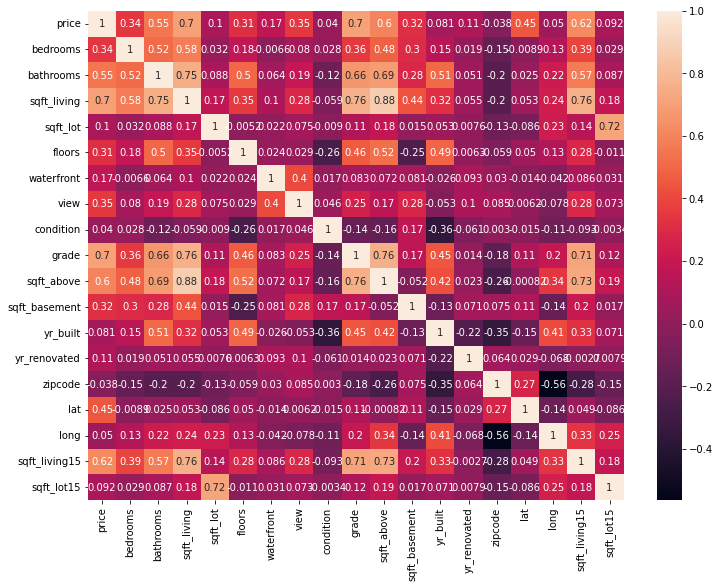

In [15]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, annot=True)

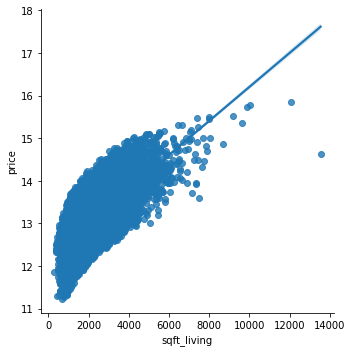

In [16]:
sns.lmplot(data=df, x="sqft_living", y="price")

<AxesSubplot:xlabel='grade', ylabel='price'>

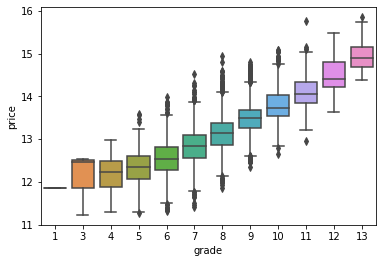

In [17]:
sns.boxplot(data=df, x="grade", y="price")

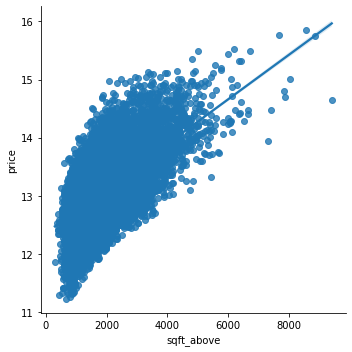

In [18]:
sns.lmplot(data=df, x="sqft_above", y="price")

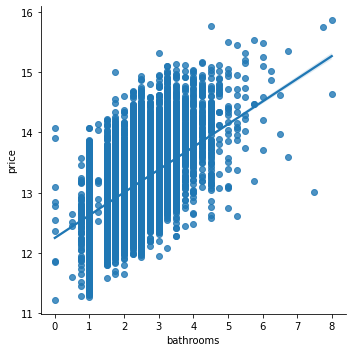

In [19]:
sns.lmplot(data=df, x="bathrooms", y="price")

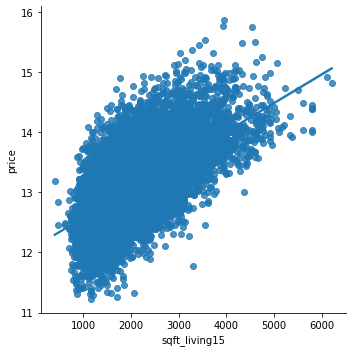

In [20]:
sns.lmplot(data=df, x="sqft_living15", y="price")

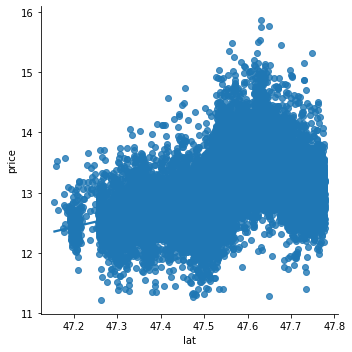

In [21]:
sns.lmplot(data=df, x="lat", y="price")

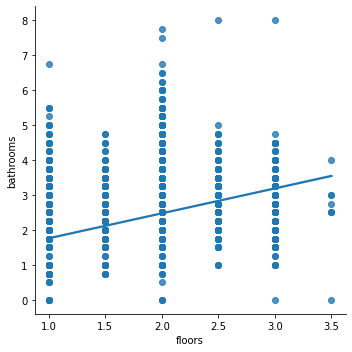

In [22]:
sns.lmplot(data=df, x="floors", y="bathrooms")

<AxesSubplot:xlabel='view', ylabel='price'>

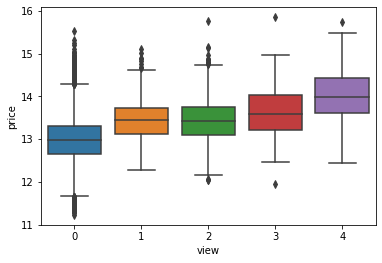

In [23]:
sns.boxplot(data=df, x="view", y="price")

<AxesSubplot:xlabel='waterfront', ylabel='price'>

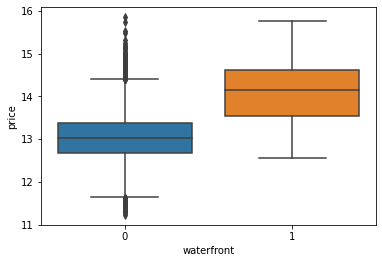

In [24]:
sns.boxplot(data=df, x="waterfront", y="price")

In [25]:
discrete.remove("zipcode")
df = df.drop(columns=["zipcode"])

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import r2_score, mean_squared_error

In [27]:
features = continious + discrete
features

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'waterfront',
 'view',
 'condition']

In [28]:
x, y = df[features], df[label]

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [30]:
numeric_transformer = Pipeline(steps=[("scaler", StandardScaler())])
preprocessor = ColumnTransformer(transformers=[("num", numeric_transformer, continious)])
pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("regressor", ElasticNetCV())])

In [31]:
model = pipeline.fit(x_train, y_train)

In [32]:
predictions = model.predict(x_test)

In [33]:
r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
print("R2: ", r2)
print("MSE: ", mse)

R2:  0.7466557428979941
MSE:  0.07065065201612883


In [34]:
results = pd.DataFrame({"y_test": y_test, "predictions": predictions})

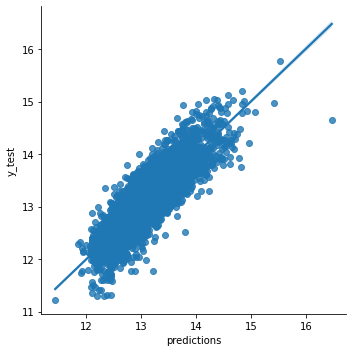

In [35]:
sns.lmplot(data=results, x="predictions", y="y_test")

In [36]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

In [37]:
ada_pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("regressor",
                                                            AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), 
                                                            n_estimators=300, 
                                                            random_state=np.random.RandomState(1)))])

In [38]:
ada_model = ada_pipeline.fit(x_train, y_train)

In [39]:
ada_predictions = ada_model.predict(x_test)

In [40]:
ada_r2 = r2_score(y_test, ada_predictions)
ada_mse = mean_squared_error(y_test, ada_predictions)
print("R2: ", ada_r2)
print("MSE: ", ada_mse)

R2:  0.7857346656246659
MSE:  0.059752629687501044


In [41]:
results_ada = pd.DataFrame({"y_test": y_test, "predictions": ada_predictions})

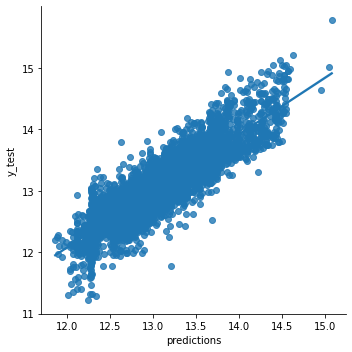

In [42]:
sns.lmplot(data=results_ada, x="predictions", y="y_test")

In [43]:
from sklearn.svm import SVR

In [44]:
svr_pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("regressor", SVR())])

In [45]:
svr_model = svr_pipeline.fit(x_train, y_train)

In [46]:
svr_predictions = svr_model.predict(x_test)

In [47]:
svr_r2 = r2_score(y_test, svr_predictions)
svr_mse = mean_squared_error(y_test, svr_predictions)
print("R2: ", svr_r2)
print("MSE: ", svr_mse)

R2:  0.8462129251275853
MSE:  0.042886928780922005


In [48]:
results_svr = pd.DataFrame({"y_test": y_test, "predictions": svr_predictions})

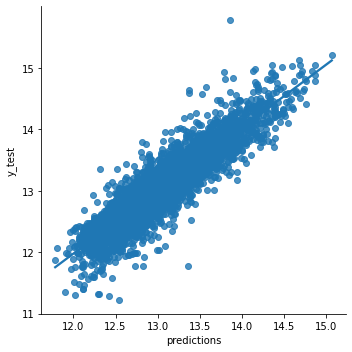

In [49]:
sns.lmplot(data=results_svr, x="predictions", y="y_test")

In [50]:
print("Elastic Net CV R2: ", r2)
print("Ada Boost with Decision Tree R2: ", ada_r2)
print("SVR R2: ", svr_r2)

Elastic Net CV R2:  0.7466557428979941
Ada Boost with Decision Tree R2:  0.7857346656246659
SVR R2:  0.8462129251275853


In [51]:
print("Elastic Net CV MSE: ", mse)
print("Ada Boost with Decision Tree MSE: ", ada_mse)
print("SVR MSE: ", svr_mse)

Elastic Net CV MSE:  0.07065065201612883
Ada Boost with Decision Tree MSE:  0.059752629687501044
SVR MSE:  0.042886928780922005
